In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from random import random, randint
from scipy.stats import linregress
from scipy.optimize import curve_fit
matplotlib.rcParams['text.usetex'] = True
from scipy.interpolate import interp1d

In [2]:
def MA(data,n):
    return np.convolve(np.ones((n,))/n,data,mode="same")

In [3]:
force_bcf=scipy.io.loadmat('BCF_force_velocity_chi45_omega122.mat')
force_tcf=scipy.io.loadmat('TCF_force_velocity_chi25_omega116.mat')
force10=scipy.io.loadmat('BCF_molasses_det10.mat')
force15=scipy.io.loadmat('BCF_molasses_det15.mat')
force20=scipy.io.loadmat('BCF_molasses_det20.mat')
force25=scipy.io.loadmat('BCF_molasses_det25.mat')
force30=scipy.io.loadmat('BCF_molasses_det30.mat')
tforce10=scipy.io.loadmat('TCF_molasses_det10.mat')
tforce15=scipy.io.loadmat('TCF_molasses_det15.mat')
tforce20=scipy.io.loadmat('TCF_molasses_det20.mat')
tforce25=scipy.io.loadmat('TCF_molasses_det25.mat')
tforce30=scipy.io.loadmat('TCF_molasses_det30.mat')
tforce35=scipy.io.loadmat('TCF_molasses_det35.mat')
tforce35_w=scipy.io.loadmat('TCF_wide_molasses_det35.mat')

In [4]:
force_bcf=force_bcf['Force']
force_tcf=force_tcf['Force']
force10=force10['Fs']
force15=force15['Fs']
force20=force20['Fs']
force25=force25['Fs']
force30=force30['Fs']
tforce10=tforce10['Fs']
tforce15=tforce15['Fs']
tforce20=tforce20['Fs']
tforce25=tforce25['Fs']
tforce30=tforce30['Fs']
tforce35=tforce35['Fs']
tforce35_w=tforce35_w['Fs']
force_bcf=force_bcf[0]
force_tcf=force_tcf[0]
force10=force10[0]
force15=force15[0]
force20=force20[0]
force25=force25[0]
force30=force30[0]
tforce10=tforce10[0]
tforce15=tforce15[0]
tforce20=tforce20[0]
tforce25=tforce25[0]
tforce30=tforce30[0]
tforce35=tforce35[0]
tforce35_w=tforce35_w[0]

In [7]:
print(len(force10))
print(len(tforce15))
print(len(force_bcf))
print(len(force_tcf))

401
401
501
501


In [5]:
X=np.linspace(-70,70,len(force15))
XW=np.linspace(-80,80,len(tforce35_w))
# Z=np.linspace(-80,0,len(force_sh))
C=np.linspace(-50,50,len(force_bcf))
Y=X/10
F_scatt=1/(1+1+4*(Y-1)**2)
F_scatt_r=F_scatt[::-1]

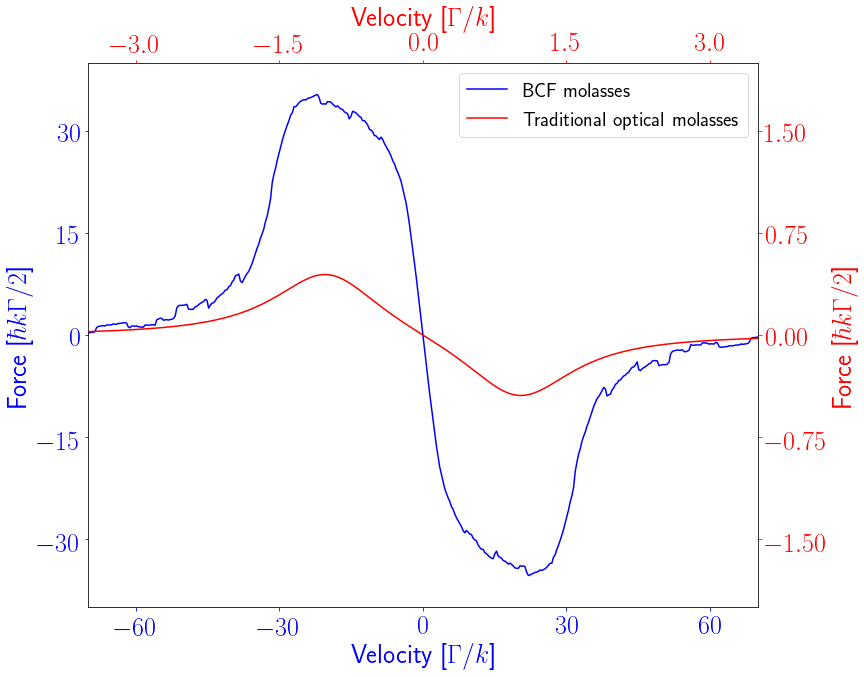

In [35]:
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
line1,=ax.plot(X,MA(force15,19),color="b")
ax.set_xlabel('Velocity [$\Gamma/k$]',color="b",fontsize=26)
ax.set_ylabel('Force [$\hbar k \Gamma/2$]',color="b",fontsize=26)
ax.set_xlim((-70,70))
ax.set_ylim((-40,40))
ax.tick_params(axis='x', colors="b",labelsize=26)
ax.tick_params(axis='y', colors="b",labelsize=26)
ax.set_yticks([-30,-15,0,15,30])
ax.set_xticks([-60,-30,0,30,60])
ax2=fig.add_subplot(111,frame_on=False)
line2,=ax2.plot(Y,-(F_scatt-F_scatt_r),color="r")
ax2.set_ylabel('Force [$\hbar k \Gamma/2$]',color="r",fontsize=26)
ax2.set_xlabel('Velocity [$\Gamma/k$]',color="r",fontsize=26)
ax2.set_xlim((-3.5,3.5))
ax2.set_ylim((-40/20,40/20))
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x', colors="r",labelsize=26)
ax2.tick_params(axis='y', colors="r",labelsize=26)
ax2.set_yticks([-1.5,-0.75,0,0.75,1.5])
ax2.set_xticks([-3,-1.5,0,1.5,3])
ax.legend((line1,line2),('BCF molasses','Traditional optical molasses'),fontsize=20)
# fig.savefig('BCF_radiative_molasses.pdf',dpi=300)
# fig.savefig('BCF_radiative_molasses.png',dpi=300)

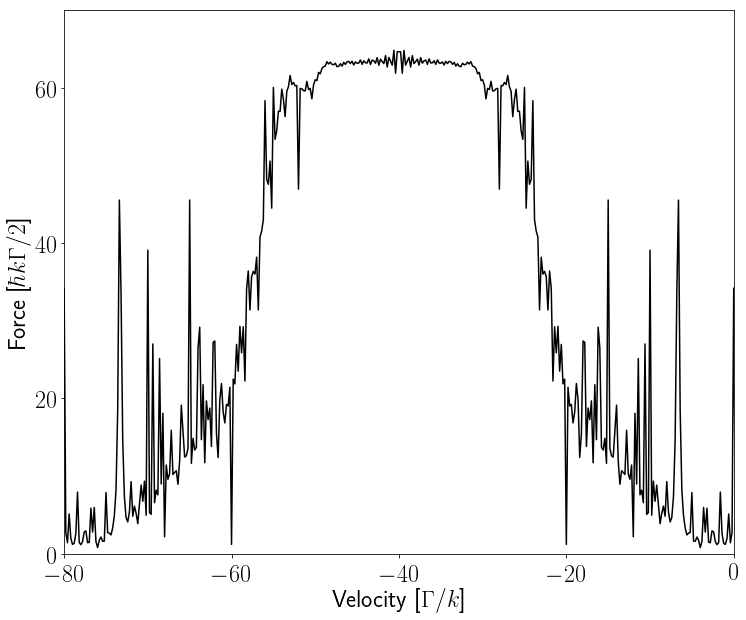

In [20]:
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
ax.plot(C-40,force_bcf,color="k")
# ax.plot([-35,35],[0,0],linestyle='--',color='gray')
ax.set_xlabel('Velocity [$\Gamma/k$]',fontsize=24)
ax.set_ylabel('Force [$\hbar k \Gamma/2$]',fontsize=24)
ax.set_xlim((-80,0))
ax.set_ylim((0,70))
ax.tick_params(axis='x',labelsize=24)
ax.tick_params(axis='y',labelsize=24)
ax.set_yticks([0,20,40,60])
# ax.set_xticks([-40,-20,0,20,40])
ax.set_xticks([-80,-60,-40,-20,0])
# fig.savefig('BCF_shifted.pdf',dpi=300)
# fig.savefig('BCF_shifted.png',dpi=300)

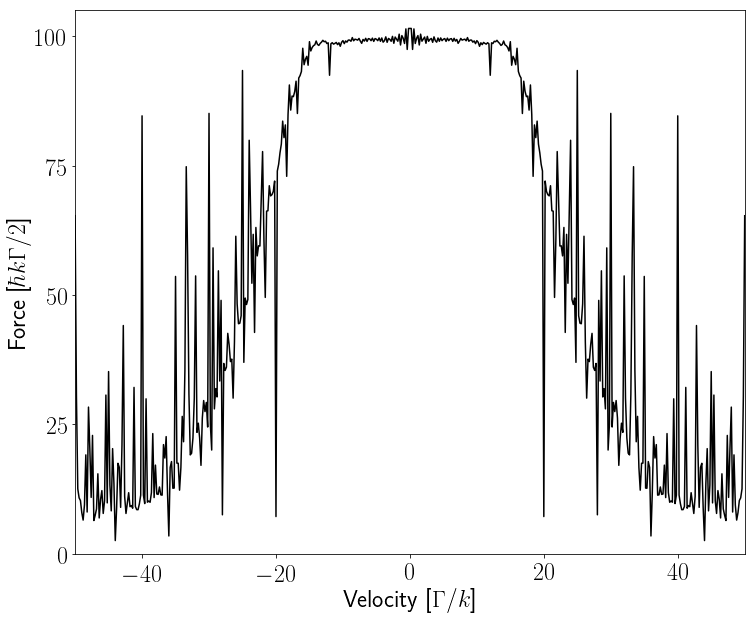

In [22]:
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
ax.plot(C,force_tcf,color="k")
ax.set_xlabel('Velocity [$\Gamma/k$]',fontsize=24)
ax.set_ylabel('Force [$\hbar k \Gamma/2$]',fontsize=24)
ax.set_xlim((-50,50))
ax.set_ylim((0,105))
ax.tick_params(axis='x',labelsize=24)
ax.tick_params(axis='y',labelsize=24)
ax.set_yticks([0,25,50,75,100])
ax.set_xticks([-40,-20,0,20,40])
# fig.savefig('TCF_center.pdf',dpi=300)
# fig.savefig('TCF_center.png',dpi=300)

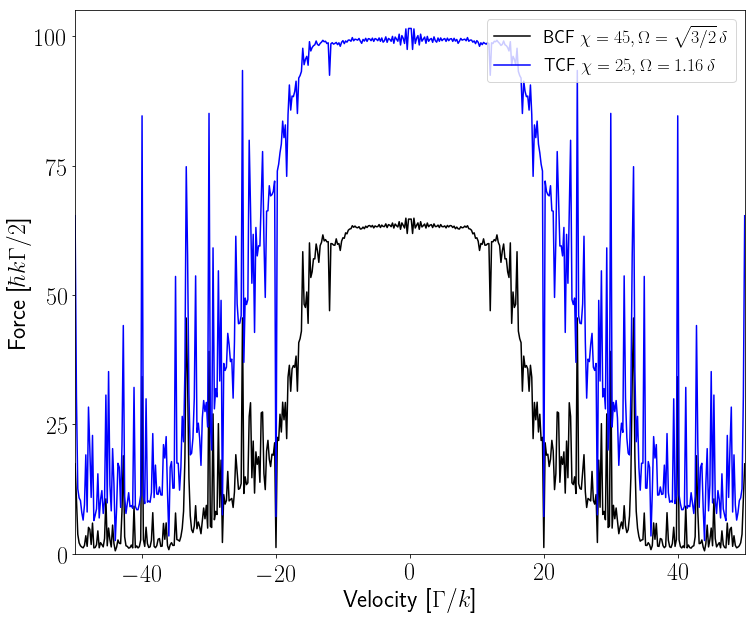

In [26]:
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
ax.plot(C,force_bcf,color="k")
ax.plot(C,force_tcf,color="b")
# ax.plot([-35,35],[0,0],linestyle='--',color='gray')
ax.set_xlabel('Velocity [$\Gamma/k$]',fontsize=24)
ax.set_ylabel('Force [$\hbar k \Gamma/2$]',fontsize=24)
ax.set_xlim((-50,50))
ax.set_ylim((0,105))
ax.tick_params(axis='x',labelsize=24)
ax.tick_params(axis='y',labelsize=24)
ax.set_yticks([0,25,50,75,100])
ax.set_xticks([-40,-20,0,20,40])
ax.legend(('BCF $\chi=45, \Omega=\sqrt{3/2}\,\delta$','TCF $\chi=25,\Omega=1.16\,\delta$'),loc=1,fontsize=18)
fig.savefig('bcf_vs_tcf.png',dpi=300)

In [68]:
FL=np.concatenate((force_bcf,np.zeros(200)))
FR=np.concatenate((np.zeros(200),force_bcf))
ZZ=np.linspace(-70,70,701)

(-70, 70)

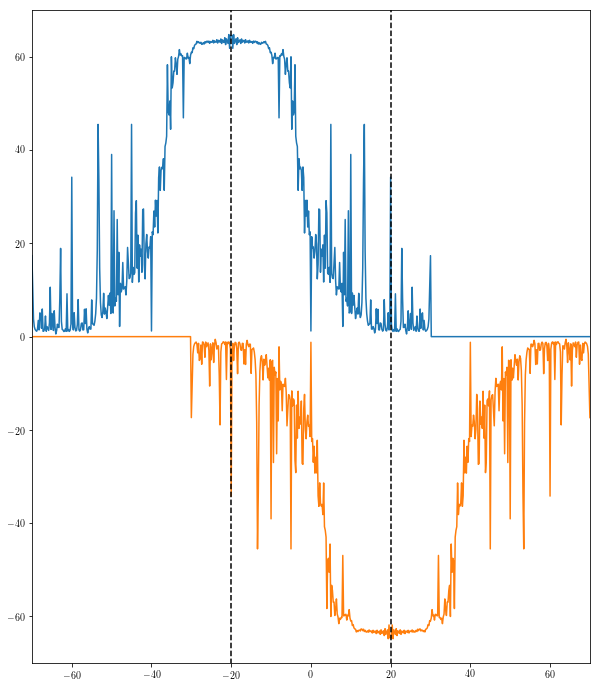

In [69]:
fig=plt.figure(figsize=(10,12))
ax=fig.add_subplot(111)
ax.plot(ZZ,FL)
ax.plot(ZZ,-FR)
ax.plot([-20,-20],[-100,100],'k--')
ax.plot([20,20],[-100,100],'k--')
ax.set_xlim([-70,70])
ax.set_ylim([-70,70])

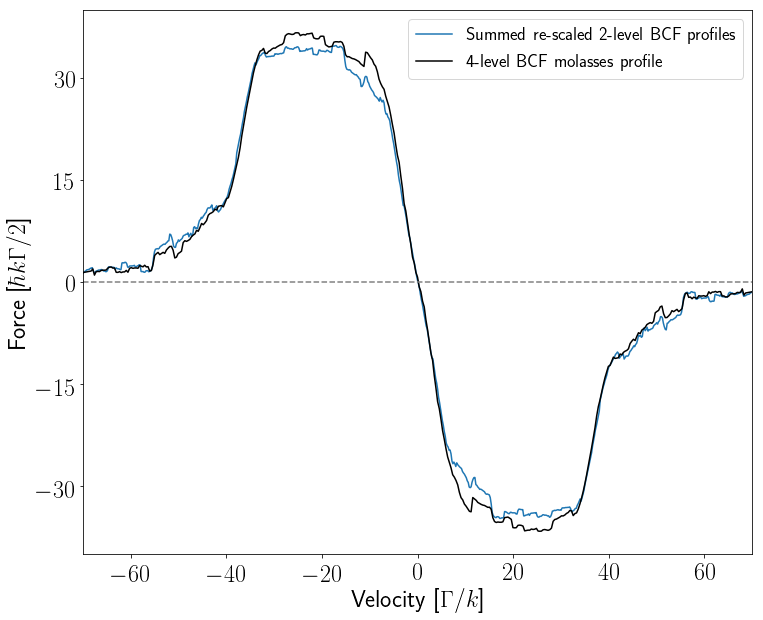

In [71]:
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
ax.plot(ZZ,4/7*MA(FL-FR,20))
# ax.plot(ZZ,MA(FL-FR,20)/(4*0.41),'r-')
# ax.plot([-20,-20],[-100,100],'k--')
# ax.plot([20,20],[-100,100],'k--')
# ax.plot(X,MA(force20,12),color='k')
ax.plot([-70,70],[0,0],linestyle='--',color='gray')
ax.set_xlabel('Velocity [$\Gamma/k$]',fontsize=24)
ax.set_ylabel('Force [$\hbar k \Gamma/2$]',fontsize=24)
ax.set_xlim((-70,70))
ax.set_ylim((-40,40))
ax.set_yticks([-30,-15,0,15,30])
ax.tick_params(axis='x',labelsize=24)
ax.tick_params(axis='y',labelsize=24)
# ax.legend(('Summed re-scaled 2-level BCF profiles','4-level BCF molasses profile'),loc=1,fontsize=18)
# fig.savefig('BCF_summed_vs_molasses_MA.pdf',dpi=300)
# fig.savefig('BCF_summed_vs_molasses_MA.png',dpi=300)


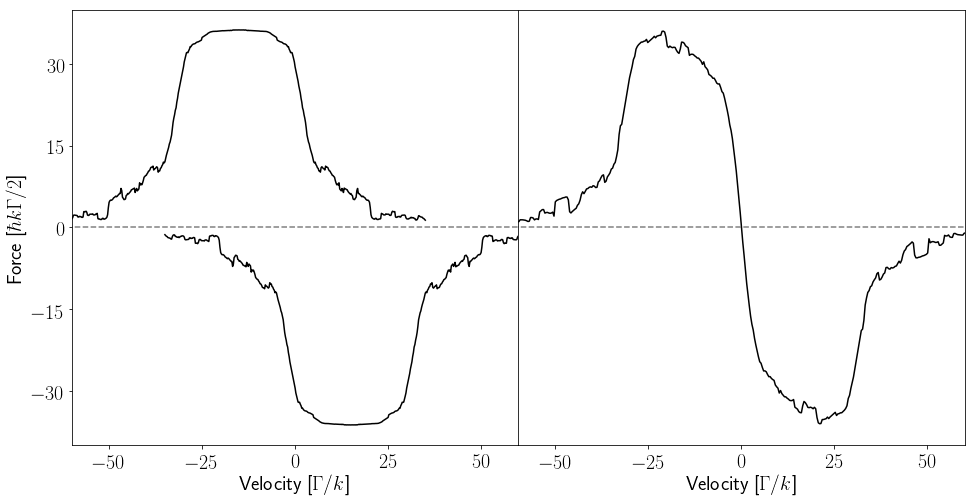

In [111]:
fig,(ax,ax2)=plt.subplots(1,2,sharey=True,sharex=False,figsize=(16,8))
fig.subplots_adjust(wspace=0)
line1,=ax.plot(C-15,4/7*MA(force_bcf,19),color='k')
line2,=ax.plot(C+15,-4/7*MA(force_bcf,19),color='k')
ax.set_xlabel('Velocity [$\Gamma/k$]',fontsize=20)
ax.set_ylabel('Force [$\hbar k \Gamma/2$]',fontsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.set_ylim([-40,40])
ax.set_xlim([-60,60])
ax.set_xticks([-50,-25,0,25,50])
ax.set_yticks([-30,-15,0,15,30])
ax.plot([-70,70],[0,0],linestyle='--',color='gray')

ax2.plot(X,MA(force15,11),color='k')
ax2.tick_params(axis='y', left=False)
ax2.tick_params(axis='x', labelsize=20)
ax2.set_xlim([-60,60])
ax2.set_xlabel('Velocity [$\Gamma/k$]',fontsize=20)
ax2.plot([-70,70],[0,0],linestyle='--',color='gray')
ax2.set_xticks([-50,-25,0,25,50])
# ax2.set_xlabel('Velocity [$\Gamma/k$]',fontsize=20)
# ax2.set_ylabel('Force [$\hbar k \Gamma/2$]',fontsize=20)
# ax2.tick_params(axis='both', labelsize=20)
# ax.legend((line1,line2),('Off-resonance BCF for $\Delta_0=-15\,\Gamma$','BCF profile shifted by $v_0=-15\,\Gamma/k$'),fontsize=12)
# fig.savefig('BCF_vs_molasses_det15.pdf',dpi=300)
# fig.savefig('BCF_vs_molasses_det15.png',dpi=300)

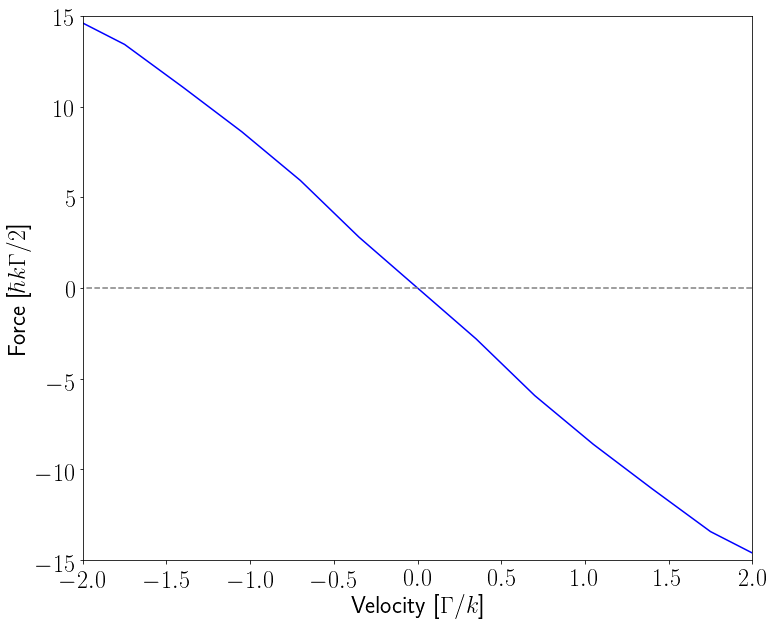

In [16]:
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
# ax.plot(X,MA(force15,3),color="b")
# ax.plot(X,force_15_interp7(X),color="r")
# ax.plot(X,force_15_interp9(X),color="g")
# ax.plot(X,force_15_interp11(X),color="k")
ax.plot(X,force_15_interp7(X),color="b")
ax.plot([-70,70],[0,0],linestyle='--',color='gray')
ax.set_xlabel('Velocity [$\Gamma/k$]',fontsize=24)
ax.set_ylabel('Force [$\hbar k \Gamma/2$]',fontsize=24)
ax.set_xlim((-2,2))
ax.set_ylim((-15,15))
# ax.set_yticks([-30,-15,0,15,30])
ax.tick_params(axis='x',labelsize=24)
ax.tick_params(axis='y',labelsize=24)
# fig.savefig('BCF_molasses_det15_MA.pdf',dpi=300)
# fig.savefig('BCF_molasses_det15_MA.png',dpi=300)

In [32]:
force_15_interp1=initiate_interp(X,MA(force15,19))
force_15_interp7=initiate_interp(X,MA(force15,7))
force_15_interp9=initiate_interp(X,MA(force20,9))
force_15_interp11=initiate_interp(X,MA(force20,11))
force_15_interp13=initiate_interp(X,MA(tforce20,7))

In [17]:
print((force_15_interp7(-1)-force_15_interp7(1))/2)

8.26707288448216


In [243]:
force_rad_interp=initiate_interp(Y,-(F_scatt-F_scatt_r))
print((force_rad_interp(-1)-force_rad_interp(1))/2)

0.44467867440542397


61
61
-9.537235347539546


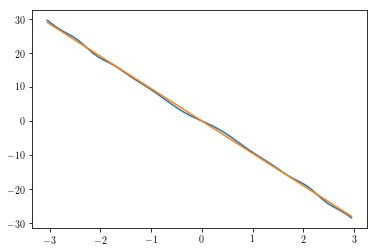

In [33]:
from scipy.stats import linregress

xx=np.arange(-3.05,3.05,0.1)
yy=force_15_interp13(xx)
print(len(yy))
print(len(xx))
slope, intercept, r_value, p_value, std_err = linregress(xx,yy)
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(xx,yy)
ax.plot(xx,slope*xx+intercept)
print(slope)

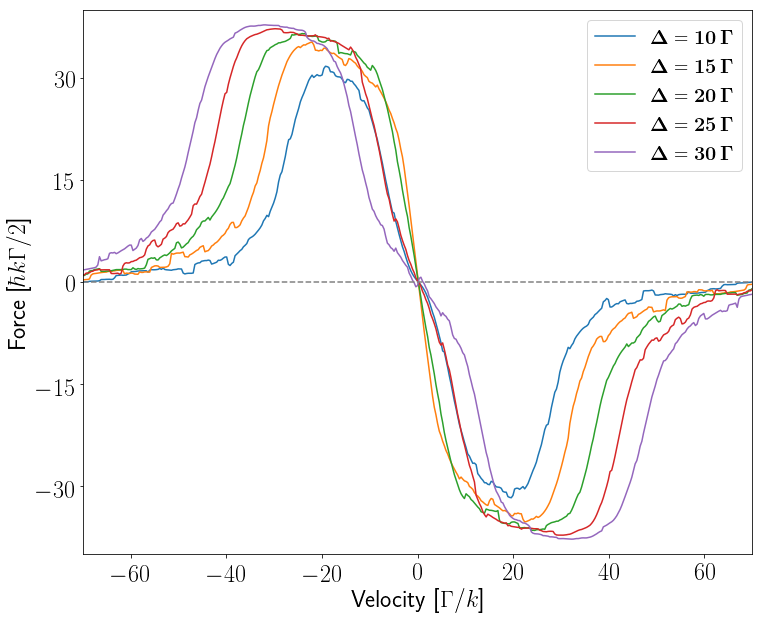

In [79]:
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
ax.plot(X,MA(force10,20))
ax.plot(X,MA(force15,20))
ax.plot(X,MA(force20,20))
ax.plot(X,MA(force25,20))
ax.plot(X,MA(force30,20))
ax.plot([-70,70],[0,0],linestyle='--',color='gray')
ax.set_xlabel('Velocity [$\Gamma/k$]',fontsize=24)
ax.set_ylabel('Force [$\hbar k \Gamma/2$]',fontsize=24)
ax.set_xlim((-70,70))
ax.set_ylim((-40,40))
ax.set_yticks([-30,-15,0,15,30])
ax.tick_params(axis='x',labelsize=24)
ax.tick_params(axis='y',labelsize=24)
ax.legend(('$\mathbf{\Delta=10\,\Gamma}$','$\mathbf{\Delta=15\,\Gamma}$','$\mathbf{\Delta=20\,\Gamma}$','$\mathbf{\Delta=25\,\Gamma}$','$\mathbf{\Delta=30\,\Gamma}$'),loc=1,fontsize=20)
# fig.savefig('BCF_molasses_comparison.pdf',dpi=300)
# fig.savefig('BCF_molasses_comparison.png',dpi=300)

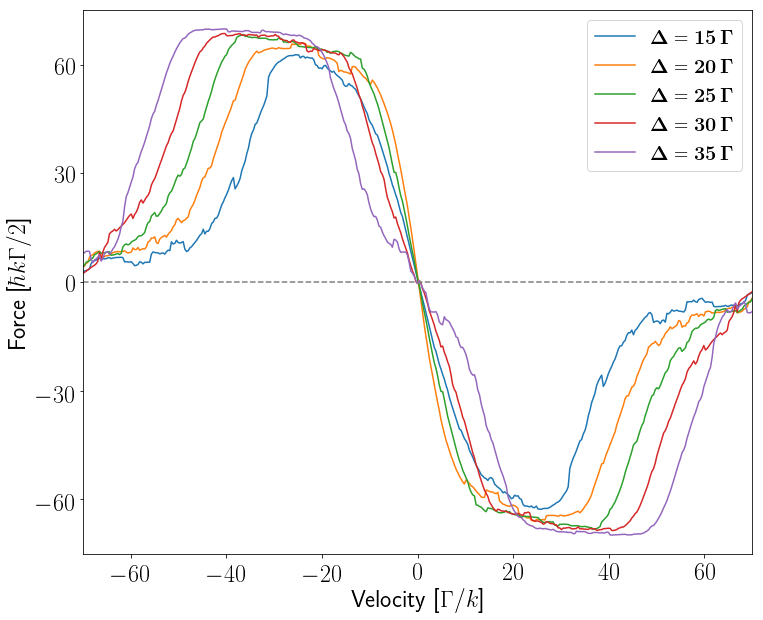

In [12]:
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
# ax.plot(X,MA(tforce10,20))
ax.plot(X,MA(tforce15,20))
ax.plot(X,MA(tforce20,20))
ax.plot(X,MA(tforce25,20))
ax.plot(X,MA(tforce30,20))
ax.plot(X,MA(tforce35,20))
ax.plot([-70,70],[0,0],linestyle='--',color='gray')
ax.set_xlabel('Velocity [$\Gamma/k$]',fontsize=24)
ax.set_ylabel('Force [$\hbar k \Gamma/2$]',fontsize=24)
ax.set_xlim((-70,70))
ax.set_ylim((-75,75))
ax.set_yticks([-60,-30,0,30,60])
ax.tick_params(axis='x',labelsize=24)
ax.tick_params(axis='y',labelsize=24)
ax.legend(('$\mathbf{\Delta=15\,\Gamma}$','$\mathbf{\Delta=20\,\Gamma}$','$\mathbf{\Delta=25\,\Gamma}$','$\mathbf{\Delta=30\,\Gamma}$','$\mathbf{\Delta=35\,\Gamma}$'),loc=1,fontsize=20)
# fig.savefig('TCF_molasses_comparison.pdf',dpi=300)
# fig.savefig('TCF_molasses_comparison.png',dpi=300)

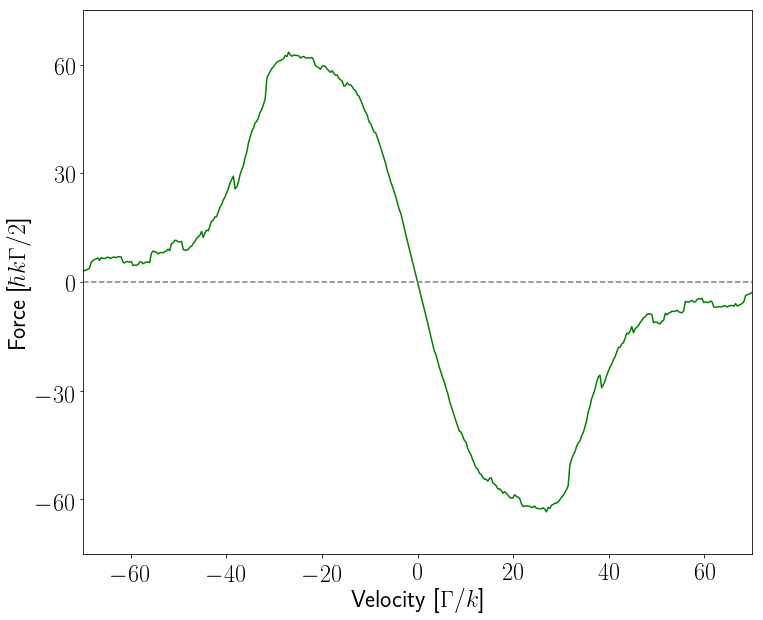

In [22]:
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
ax.plot(X,MA(tforce15,19),color="g")
ax.plot([-70,70],[0,0],linestyle='--',color='gray')
ax.set_xlabel('Velocity [$\Gamma/k$]',fontsize=24)
ax.set_ylabel('Force [$\hbar k \Gamma/2$]',fontsize=24)
ax.set_xlim((-70,70))
ax.set_ylim((-75,75))
ax.set_yticks([-60,-30,0,30,60])
ax.tick_params(axis='x',labelsize=24)
ax.tick_params(axis='y',labelsize=24)
# fig.savefig('TCF_molasses_det15_MA.pdf',dpi=300)
# fig.savefig('TCF_molasses_det15_MA.png',dpi=300)

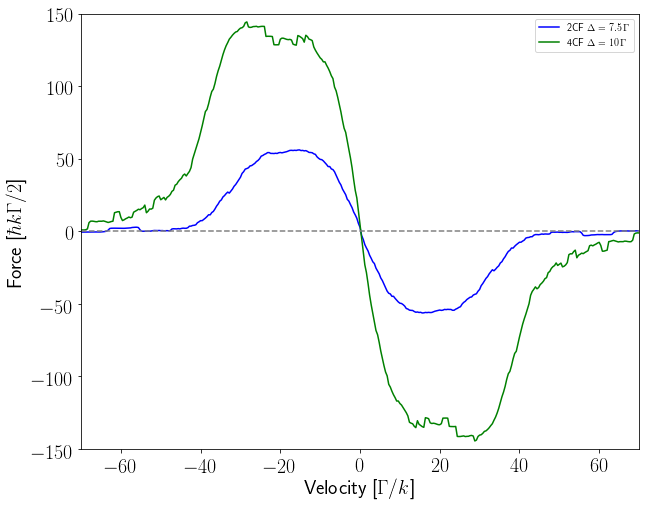

In [16]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
ax.plot(X,MA(2*0.41*force15,20),color="b")
ax.plot(X,MA(2*0.41*tforce20,20),color="g")
ax.plot([-70,70],[0,0],linestyle='--',color='gray')
ax.set_xlabel('Velocity [$\Gamma/k$]',fontsize=20)
ax.set_ylabel('Force [$\hbar k \Gamma/2$]',fontsize=20)
ax.set_xlim((-70,70))
ax.set_ylim((-150,150))
ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)
ax.legend(('2CF $\Delta=7.5\,\Gamma$','4CF $\Delta=10\,\Gamma$'))

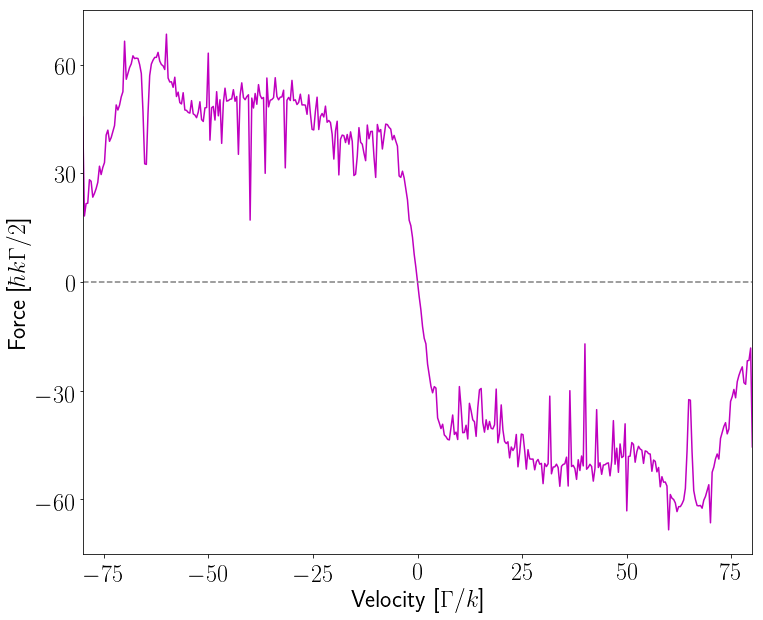

In [27]:
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
ax.plot(XW,tforce35_w,color="m")
ax.plot([-80,80],[0,0],linestyle='--',color='gray')
ax.set_xlabel('Velocity [$\Gamma/k$]',fontsize=24)
ax.set_ylabel('Force [$\hbar k \Gamma/2$]',fontsize=24)
ax.set_xlim((-80,80))
ax.set_ylim((-75,75))
ax.set_yticks([-60,-30,0,30,60])
ax.set_xticks([-75,-50,-25,0,25,50,75])
ax.tick_params(axis='x',labelsize=24)
ax.tick_params(axis='y',labelsize=24)
# fig.savefig('TCF_wide_molasses_det35.pdf',dpi=300)
# fig.savefig('TCF_wide_molasses_det35.png',dpi=300)

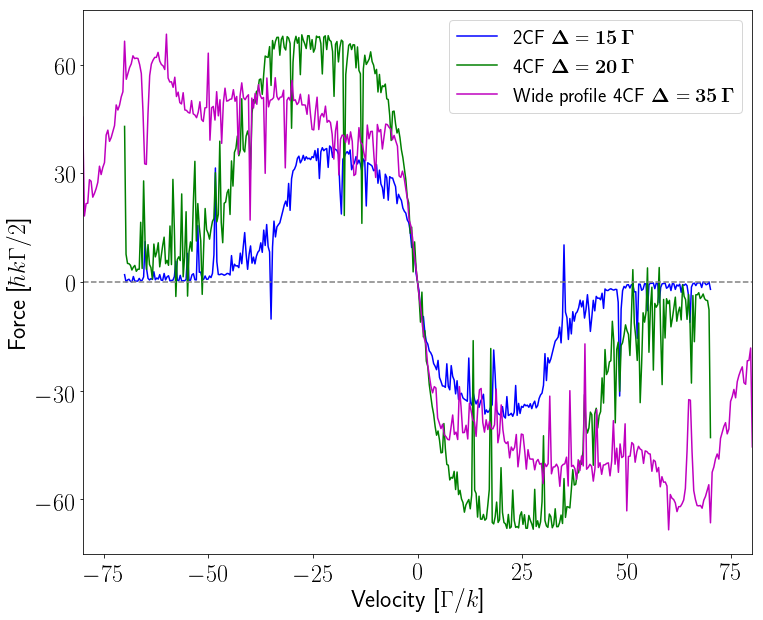

In [33]:
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
ax.plot(X,force15,color="b")
ax.plot(X,tforce20,color="g")
ax.plot(XW,tforce35_w,color="m")
ax.plot([-80,80],[0,0],linestyle='--',color='gray')
ax.set_xlabel('Velocity [$\Gamma/k$]',fontsize=24)
ax.set_ylabel('Force [$\hbar k \Gamma/2$]',fontsize=24)
ax.set_xlim((-80,80))
ax.set_ylim((-75,75))
ax.set_yticks([-60,-30,0,30,60])
ax.set_xticks([-75,-50,-25,0,25,50,75])
ax.tick_params(axis='x',labelsize=24)
ax.tick_params(axis='y',labelsize=24)
ax.legend(('2CF $\mathbf{\Delta=15\,\Gamma}$','4CF $\mathbf{\Delta=20\,\Gamma}$','Wide profile 4CF $\mathbf{\Delta=35\,\Gamma}$'),loc=1,fontsize=20)
fig.savefig('3molasses_comparison_noMA.pdf',dpi=300)
fig.savefig('3molasses_comparison_noMA.png',dpi=300)

In [83]:
BaH_file = np.genfromtxt('bah2levelComparison.csv', delimiter=',')
print(BaH_file.shape)

(501, 3)


In [95]:
BaH_velocities=BaH_file[:,0]
BaH_2lvl=BaH_file[:,2]
BaH_bcf=BaH_file[:,1]

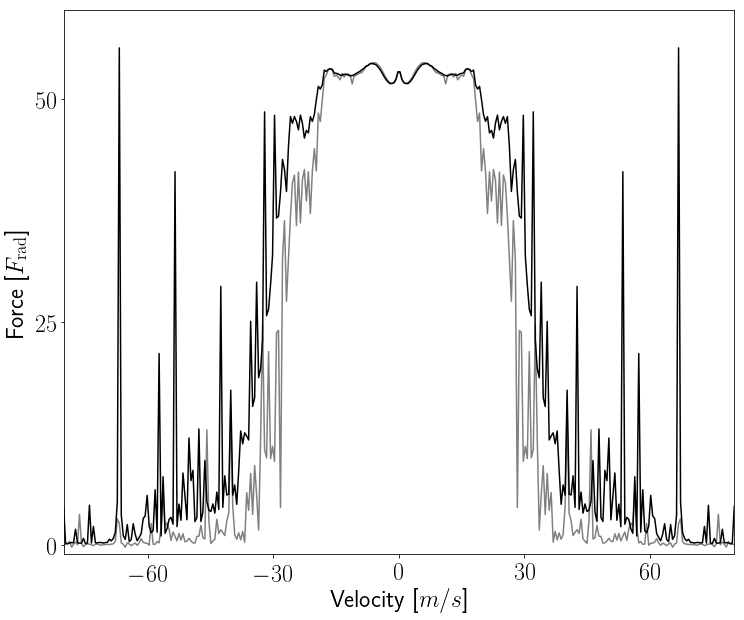

In [98]:
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
ax.plot(BaH_velocities,BaH_2lvl,color="gray")
ax.plot(BaH_velocities,BaH_bcf,color="k")
ax.set_xlabel('Velocity [$m/s$]',fontsize=24)
ax.set_ylabel('Force [$F_{\mathrm{rad}}$]',fontsize=24)
ax.set_xlim((-80,80))
ax.set_ylim((-1,60))
ax.set_xticks([-60,-30,0,30,60])
ax.set_yticks([0,25,50])
ax.tick_params(axis='x',labelsize=24)
ax.tick_params(axis='y',labelsize=24)
fig.savefig('BaH_effective_force_profile.pdf',dpi=300)
fig.savefig('BaH_effective_force_profile.png',dpi=300)
# ax.legend(('2CF $\mathbf{\Delta=15\,\Gamma}$','4CF $\mathbf{\Delta=15\,\Gamma}$','Wide profile 4CF $\mathbf{\Delta=35\,\Gamma}$'),loc=1,fontsize=20)

In [47]:
HT=np.load('det15_molasses_T.npy')
HT_means=np.mean(HT,axis=0)
HT_std=np.std(HT,axis=0)/np.sqrt(3)

In [52]:
LT=np.load('det20_molasses_T.npy')
LT_means=np.mean(LT,axis=0)
LT_std=np.std(LT,axis=0)/np.sqrt(3)

In [53]:
LV=np.load('det20_molasses_V.npy')
LV_means=np.concatenate((LV[0,:,:],LV[1,:,:],LV[2,:,:]),axis=1)
print(LV_means.shape)

(101, 30000)


In [48]:
HV=np.load('det15_molasses_V.npy')
HV_means=np.concatenate((HV[0,:,:],HV[1,:,:],HV[2,:,:]),axis=1)
print(HV_means.shape)

(101, 30000)


In [67]:
T_limits=[]
for i in range(3):
    T_limits.append(np.mean(LT[i,-50:]))
T_limit_mean=np.mean(T_limits)
T_means=LT_means
T_errs=LT_std

def T_fun(t,T_L,T_0,tau):
        return T_L+(T_0-T_L)*np.exp(-t/tau)


time=np.arange(0,201,2)

popt,pcov=curve_fit(T_fun,time,T_means)

#From tau we can obtain effective slope
beta=M/(2*popt[2]*10**(-6))/(hbar*k**2/2)

print('T_L = {0:.3f} mK'.format(popt[0]*1000))
print('tau = {0:.3f} us'.format(popt[2]))
print('beta = {0:.3f} hk2/2'.format(beta))


T_L = 38.430 mK
tau = 16.269 us
beta = 3.832 hk2/2


In [ ]:
#With a cooling profile that's linear around v=0, i.e. F=-beta*v, we expect an exponentially decaying temperature
def T_fun(t,T_L,T_0,tau):
        return T_L+(T_0-T_L)*np.exp(-t/tau)

#We will plot means over multiple runs of a simulation
T_means=np.mean(T_all[:],axis=0)
T_errs=np.std(T_all[:],axis=0)/np.sqrt(runs)
time=np.linspace(0,t_total*10**6,record_steps)

#We fit to find the limiting temperature T_L and the tau parameter
popt,pcov=curve_fit(T_fun,time,T_means)



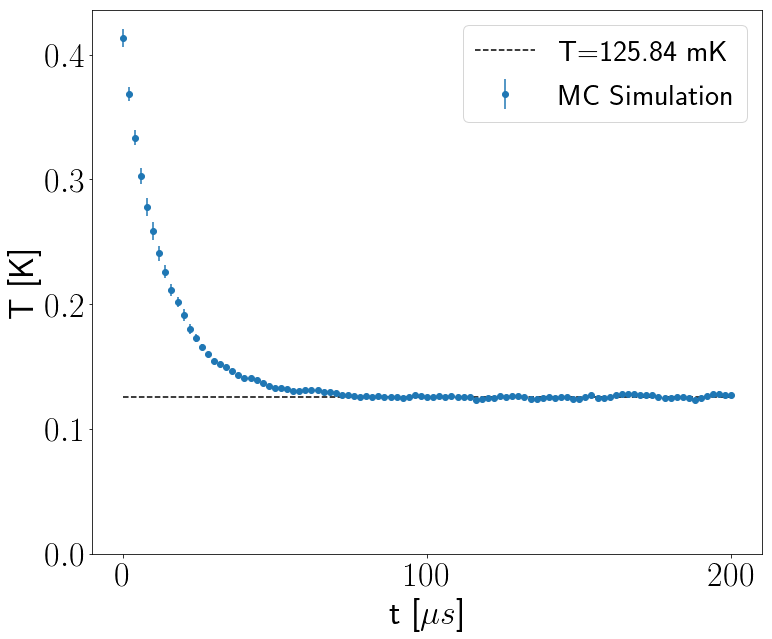

In [66]:
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
ax.errorbar(time,T_means,yerr=T_errs,fmt='o',label="MC Simulation")
# ax.plot(time,T_fun(time,*popt),label='Fit')
ax.plot(time,len(time)*[T_limit_mean],'k--',label="T=%.2f mK" %(T_limit_mean*1000))
ax.tick_params(axis='x',labelsize=34)
ax.tick_params(axis='y',labelsize=34)
ax.set_ylabel('T [K]',fontsize=34)
ax.set_xlabel('t [$\mu s$]',fontsize=34)
# ax.set_ylim([0.0,0.017])
# ax.set_xlim([400,500])
ax.set_xticks([0,100,200])
ax.set_yticks([0,0.1,0.2,0.3,0.4])
plt.legend(loc=1,fontsize=30)
# fig.savefig('T_decay_lowT.pdf',dpi=300)
# fig.savefig('T_decay_lowT.png',dpi=300)

In [ ]:
from scipy.interpolate import spline

V_means=HV_means


fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)

fracs,vels_e=np.histogram(V_means[-1,:],bins=np.linspace(min(V_means[-1,:]),max(V_means[-1,:]),101),density=True)
T_end=np.std(V_means[-1,:])
T_end_act=LT_means[-1]*1000
T_0=np.std(V_means[0,:])
vels=np.linspace(min(V_means[0,:]),max(V_means[0,:]),501)
T_0_act=T_factor*T_0**2*1000

vels_e=[(vels_e[i]+vels_e[i+1])/2 for i in range(len(vels_e)-1)]

smooth=spline(vels_e,fracs,vels)
ax.plot(vels,1/np.sqrt(2*np.pi*T_0**2)*np.exp(-vels**2/(2*T_0**2)),label='T=%.2f mK'% T_0_act,color='b')
# ax.plot(vels,1/np.sqrt(2*np.pi*T_0**2)*np.exp(-vels**2/(2*T_0**2)),label='$t=0$',color='b')
ax.plot(vels,1/np.sqrt(2*np.pi*T_end**2)*np.exp(-vels**2/(2*T_end**2)),label='T=%.2f mK'% T_end_act,color='orange')
# ax.plot(vels,smooth,color='orange',label='$t=%d\,\mu s$'%(400))
ax.set_xlim((-10,10))
ax.set_ylim((0,0.6))

ax.set_xlabel('Velocity [$m/s$]',fontsize=20)
ax.set_ylabel('$\\rho(v)$',fontsize=20)
        
    
ax.tick_params(axis='y',labelsize=20)
ax.tick_params(axis='x',labelsize=20)

ax.legend(loc=1,fontsize=16)
plt.show()
# fig.savefig('velocity_spread_highT.pdf',dpi=300)
# fig.savefig('velocity_spread_highT.png',dpi=300)

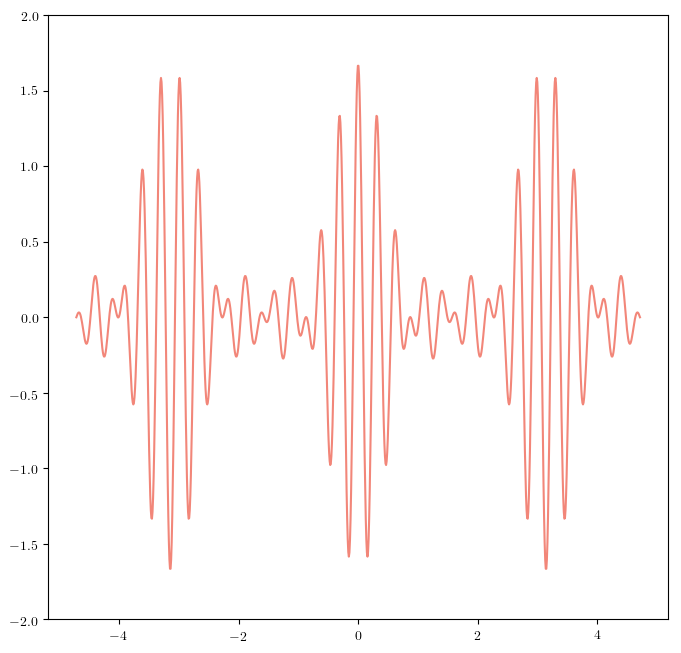

In [79]:
chi=np.pi/6
pcf=1
fig=plt.figure(figsize=(8,8),dpi=100)
ax=fig.add_subplot(111)
X=np.linspace(-3*np.pi/2,3*np.pi/2,1000)
ax.plot(X,np.cos(X)*np.cos(chi/2)*np.cos(20*X)+pcf*np.cos(3*X)*np.cos(3*chi/2)*np.cos(20*X),color='#F28679')
# ax.plot(X,np.cos(X)*np.cos(chi/2)+pcf*np.cos(3*X)*np.cos(3*chi/2),'b--',alpha=0.3)
# ax.plot(X,-np.cos(X)*np.cos(chi/2)-pcf*np.cos(3*X)*np.cos(3*chi/2),'b--',alpha=0.3)
ax.set_ylim([-2,2])
plt.show()

In [59]:
eps=1/3
print(4*2*eps*eps/(2*eps)**3*(12.508)**2/(3.79*1/2)*(hbar*Gamma/(2*kB)))
print(3820*(hbar*Gamma/(2*kB)))

0.006656542405727548
0.10266544180048219


In [74]:
print(20.11/(2*(4/7)**2)*(0.5*103.4*4/7)**2/(4.9)*(hbar*Gamma/(2*kB)))

0.14741035720382967


In [57]:
M=0.138905/(6.02214077*10**(23))
Gamma=2*np.pi*1.12*10**6
k=2*np.pi/(1060.7868*10**(-9))
hbar=1.0545718*10**(-34)
kB=1.38064852*10**(-23)
v_factor=Gamma/k
T_factor=M/kB
F_rad=hbar*k*Gamma/2
print(T_factor)

0.01670643725767134


In [69]:
omr=hbar*k**2/(2*M)
print(np.pi/(2*omr))

0.0001958561312789676


In [7]:
def initiate_interp(Vs,force_profile):
    f=interp1d(Vs,force_profile,kind="cubic")
    return f

42.249700043507545
-42.249700043495274


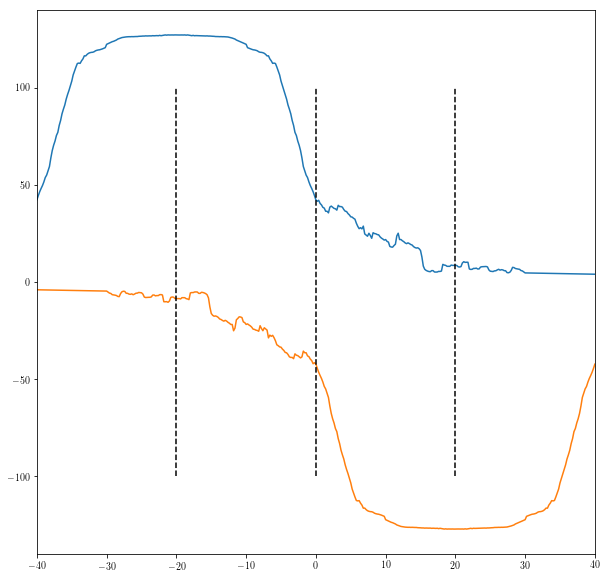

In [146]:
prf=scipy.io.loadmat('BCF_force_velocity_chi45_omega122.mat')
prf=prf['Force']
prf=prf[0]*2
Delta=20
step=0.2
v_factor=1

Vs=np.arange(-50,50+step,step)-Delta
sm_prf=MA(prf,19)



f_sm_prf=np.concatenate((np.zeros(5),sm_prf,np.zeros(5)))
f_Vs=np.concatenate((np.linspace(-195,-100,5),Vs,np.linspace(100,195,5)))*v_factor


Vs_r=Vs+2*Delta
sm_prf_r=-sm_prf


f_sm_prf_r=np.concatenate((np.zeros(5),sm_prf_r,np.zeros(5)))
f_Vs_r=np.concatenate((np.linspace(-195,-100,5),Vs_r,np.linspace(100,195,5)))*v_factor


fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.plot(f_Vs,f_sm_prf)
ax.plot(f_Vs_r,f_sm_prf_r)
ax.plot([0,0],[-100,100],"k--")
ax.plot([Delta*v_factor,Delta*v_factor],[-100,100],"k--")
ax.plot([-Delta*v_factor,-Delta*v_factor],[-100,100],"k--")
ax.set_xlim(-40*v_factor,40*v_factor)
# ax.set_ylim(-40,40)



force_left=initiate_interp(f_Vs,f_sm_prf)
force_right=initiate_interp(f_Vs_r,f_sm_prf_r)

# X=np.arange(-20*v_factor,-5*v_factor,0.05*v_factor)
# Y=np.arange(-5*v_factor,10*v_factor,0.05*v_factor)

# ax2=fig.add_subplot(122)
# ax2.plot(X,force_left(X))
# ax2.plot(X[::-1],force_left(Y))


print(force_left(0*v_factor))
print(force_right(0*v_factor))





41
41
-13.011075123846469


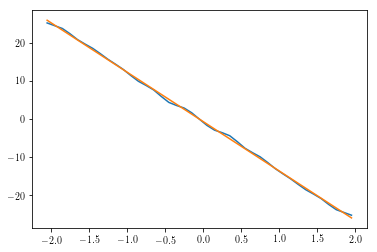

In [145]:
XX=np.arange(-35*v_factor,35.1*v_factor,0.1*v_factor)
YY=MA(force_left(XX)+force_right(XX),1)
fig=plt.figure()
ax=fig.add_subplot(111)
# ax.plot(XX,YY)

from scipy.stats import linregress

yy=YY[330:371]
xx=np.arange(-2.05,2.05,0.1)
print(len(yy))
print(len(xx))
slope, intercept, r_value, p_value, std_err = linregress(xx,yy)
ax.plot(xx,yy)
ax.plot(xx,slope*xx+intercept)
print(slope)

In [263]:
from scipy.special import factorial
def gaussian(X,u,s):
    return 1/np.sqrt(2*np.pi*s)*np.exp(-(X-u)**2/(2*s))
def poisson(X,u):
    return np.power(u,X)*np.exp(-u)/factorial(X)
def erlang(X,u,rate):
    k=int(u*rate)
    return np.power(X,k-1)*np.exp(-rate*X)*rate**k/factorial(k-1)

In [25]:
means=[]
times1=[]
times2=[]
forces=[]
variances=[]
n=10**4
k_gamma=2*100/np.pi
T=5*10**4
Tss=np.zeros((2,n))
# X=np.array([0.005,0.0075,0.01,0.02,0.0035,0.05,0.075,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5])
Y=[45/180,22.5/180]
# TT=np.array([250,500,750,1000,2000,3000,5000,7000,9000,12000,15000])
k=0
for y in Y:
    B1=1/y
    B2=1/(1-1/B1)
    
    

    R=[]
    Ts1=[]
    Ts2=[]
    prev=0
    for i in range(n):
        t=T
        C=0
        T1=0
        T2=0
        while t>0:
            C+=1
            if prev==0:
                x=np.random.exponential(scale=B1)
                t-=x
                prev=1
                T1+=x*k_gamma
            else:
                x=np.random.exponential(scale=B2)
                t-=x
                prev=0
                T2+=x*k_gamma

        R.append(C)
        Ts1.append(T1)
        Ts2.append(T2)
        if i%1000==0:
            print(i)
            np.random.seed()
    Ts1=np.array(Ts1)
    Ts2=np.array(Ts2)

    Tss[k,:]=2*(Ts1-Ts2)/T
    k+=1

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
0
1000
2000
3000
4000
5000
6000
7000
8000
9000


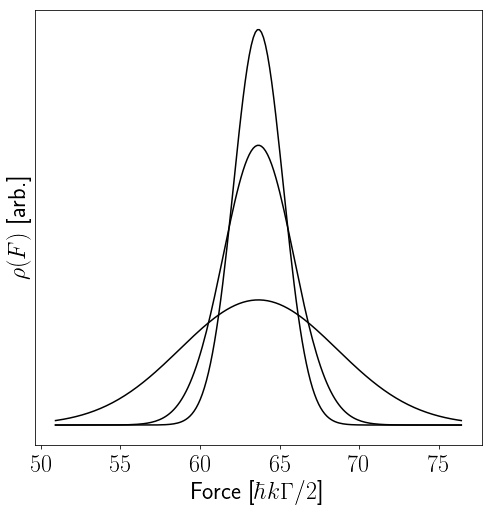

In [14]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
T=10**3
for j in range(1):
    Z=2*k_gamma*(1-2*Y[j])
#     n,bins,patches=ax.hist(Tss[j,:],200, facecolor='blue', alpha=0.4,density=True)
    ax.plot(np.linspace(0.8*Z,1.2*Z,200),gaussian(np.linspace(0.8*Z,1.2*Z,200),Z,4*8*k_gamma**2*Y[j]*(1-Y[j])/T),'k-')
    ax.plot(np.linspace(0.8*Z,1.2*Z,200),gaussian(np.linspace(0.8*Z,1.2*Z,200),Z,4*8*k_gamma**2*Y[j]*(1-Y[j])/(5*T)),'k-')
    ax.plot(np.linspace(0.8*Z,1.2*Z,200),gaussian(np.linspace(0.8*Z,1.2*Z,200),Z,4*8*k_gamma**2*Y[j]*(1-Y[j])/(10*T)),'k-')
#     ax.plot(bins,poisson(bins,Z),'k-')
    
#     ax.plot(np.linspace(Z*0.8,Z*1.2,100),gaussian(np.linspace(Z*0.8,Z*1.2,100),Z,Z/T),'r-')
ax.set_ylabel('$\\rho(F)$ [arb.]',fontsize=24)
ax.set_xlabel('Force [$\hbar k \Gamma/2$]',fontsize=24)
# ax.tick_params(axis='y',labelsize=24)
ax.tick_params(axis='x',labelsize=24)
ax.tick_params(axis='y', left=False)
ax.set_yticks([])
# plt.text(48, 0.05, r'2-color force',
#          {'color': 'black', 'fontsize': 18, 'ha': 'center', 'va': 'center',
#           'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
# plt.text(83, 0.07, r'4-color force',
#          {'color': 'black', 'fontsize': 18, 'ha': 'center', 'va': 'center',
#           'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

plt.show()




In [17]:
bins

array([ 74.72540649,  75.21909274,  75.71277899,  76.20646525,
        76.7001515 ,  77.19383775,  77.687524  ,  78.18121026,
        78.67489651,  79.16858276,  79.66226902,  80.15595527,
        80.64964152,  81.14332778,  81.63701403,  82.13070028,
        82.62438654,  83.11807279,  83.61175904,  84.10544529,
        84.59913155,  85.0928178 ,  85.58650405,  86.08019031,
        86.57387656,  87.06756281,  87.56124907,  88.05493532,
        88.54862157,  89.04230782,  89.53599408,  90.02968033,
        90.52336658,  91.01705284,  91.51073909,  92.00442534,
        92.4981116 ,  92.99179785,  93.4854841 ,  93.97917036,
        94.47285661,  94.96654286,  95.46022911,  95.95391537,
        96.44760162,  96.94128787,  97.43497413,  97.92866038,
        98.42234663,  98.91603289,  99.40971914,  99.90340539,
       100.39709165, 100.8907779 , 101.38446415, 101.8781504 ,
       102.37183666, 102.86552291, 103.35920916, 103.85289542,
       104.34658167, 104.84026792, 105.33395418, 105.82

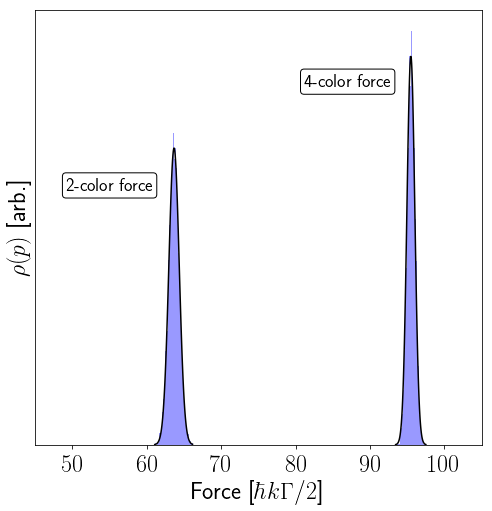

In [34]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
for j in range(2):
    Z=(1-2*Y[j])*k_gamma*2
    n,bins,patches=ax.hist(Tss[j,:],100, facecolor='blue', alpha=0.4,density=True)
    ax.plot(bins,gaussian(bins,Z,4*8*k_gamma**2*Y[j]*(1-Y[j])/T),'k-')
#     ax.plot(bins,erlang(bins,Y[j]*T,Y[j])-erlang(bins,(1-Y[j])*T,(1-Y[j])))
#     ax.plot(bins,gaussian(bins,Z,Z),'r-')
ax.set_ylabel('$\\rho(p)$ [arb.]',fontsize=24)
ax.set_xlabel('Force [$\hbar k\Gamma/2$]',fontsize=24)
ax.tick_params(axis='y',labelsize=24)
ax.tick_params(axis='x',labelsize=24)
ax.tick_params(axis='y', left=False)
ax.set_xticks([50,60,70,80,90,100])
ax.set_xlim([45,105])
ax.set_yticks([])
# ax.ticklabel_format(axis='x',style='sci',scilimits=(0,0))
ax.text(55,0.5, r'2-color force',
         {'color': 'black', 'fontsize': 18, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
plt.text(87,0.7, r'4-color force',
         {'color': 'black', 'fontsize': 18, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
# plt.rc('font',size=24)
plt.show()



In [461]:
print(erlang(bins,10,1)-erlang(bins,8,1))

10
8
[1.32273526e-02 1.17645850e-02 1.04281413e-02 9.21360830e-03
 8.11532977e-03 7.12677233e-03 6.24083452e-03 5.45010383e-03
 4.74706609e-03 4.12427243e-03 3.57446880e-03 3.09069322e-03
 2.66634555e-03 2.29523418e-03 1.97160378e-03 1.69014772e-03
 1.44600830e-03 1.23476771e-03 1.05243183e-03 8.95409174e-04
 7.60486280e-04 6.44801195e-04 5.45815904e-04 4.61288651e-04
 3.89246765e-04 3.27960461e-04 2.75917968e-04 2.31802184e-04
 1.94469025e-04 1.62927495e-04 1.36321510e-04 1.13913422e-04
 9.50691887e-05 7.92450968e-05 6.59759389e-05 5.48645335e-05
 4.55724783e-05 3.78120243e-05 3.13389622e-05 2.59464160e-05
 2.14594478e-05 1.77303809e-05 1.46347590e-05 1.20678630e-05
 9.94171825e-06 8.18252841e-06 6.72848067e-06 5.52787315e-06
 4.53752054e-06 3.72139930e-06 3.04949898e-06 2.49685008e-06
 2.04270274e-06 1.66983433e-06 1.36396643e-06 1.11327497e-06
 9.07979162e-07 7.39997092e-07 6.02657681e-07 4.90460036e-07
 3.98872721e-07 3.24166561e-07 2.63275532e-07 2.13681189e-07
 1.73316757e-07 1.4

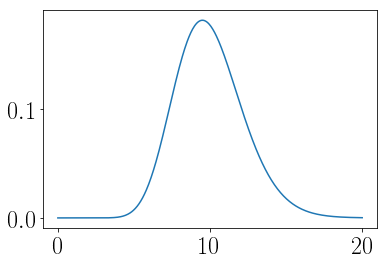

In [473]:
X_er=np.linspace(0,20,500)
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(X_er,erlang(X_er,10,2))

In [258]:
from random import random, randint

In [294]:
means=[]
times1=[]
times2=[]
times3=[]
times4=[]
forces=[]
variances=[]
n=5*10**3
k_gamma=2*100/np.pi
T=5*10**4
Tss=np.zeros((2,n))
# X=np.array([0.005,0.0075,0.01,0.02,0.0035,0.05,0.075,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5])
Y=[45/180,25/180]
# TT=np.array([250,500,750,1000,2000,3000,5000,7000,9000,12000,15000])
k=0
for y in Y:
    B1=1/y
    B2=1/(1-1/B1)
    B3=B1
    B4=B2
    

    R=[]
    Ts1=[]
    Ts2=[]
    Ts3=[]
    Ts4=[]
    state=randint(1,4)
    for i in range(n):
        t=T
        C=0
        T1=0
        T2=0
        T3=0
        T4=0
        while t>0:
            C+=1
            if state==1:
                x=np.random.exponential(scale=B1)
                t-=x
                s=random()
                if s<2/3:
                    state=2
                elif s<(1-y)*1/3+2/3:
                    state=3
                else:
                    state=4
                T1+=x*k_gamma
            elif state==2:
                x=np.random.exponential(scale=B2)
                t-=x
                s=random()
                if s<2/3:
                    state=1
                elif s<(1-y)*1/3+2/3:
                    state=3
                else:
                    state=4
                T2+=x*k_gamma
            elif state==3:
                x=np.random.exponential(scale=B3)
                t-=x
                s=random()
                if s<2/3:
                    state=4
                elif s<(1-y)*1/3+2/3:
                    state=1
                else:
                    state=2
                T3+=x*k_gamma
            else:
                x=np.random.exponential(scale=B4)
                t-=x
                s=random()
                if s<2/3:
                    state=3
                elif s<(1-y)*1/3+2/3:
                    state=1
                else:
                    state=2
                T4+=x*k_gamma

        R.append(C)
        Ts1.append(T1)
        Ts2.append(T2)
        Ts3.append(T3)
        Ts4.append(T4)
        if i%1000==0:
            print(i)
            np.random.seed()
    Ts1=np.array(Ts1)
    Ts2=np.array(Ts2)
    Ts3=np.array(Ts3)
    Ts4=np.array(Ts4)
    
    Tss[k,:]=((Ts1-Ts2)-(Ts3-Ts4))/T
    k+=1

0
1000
2000
3000
4000
0
1000
2000
3000
4000


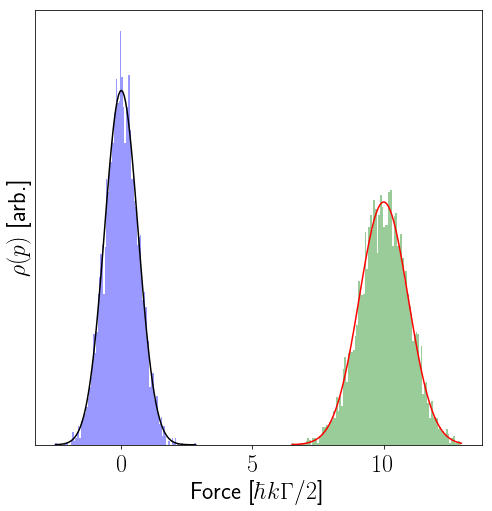

In [323]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
for j in range(2):
    Z=0
    
    if j==0:
        n,bins,patches=ax.hist(Tss[j,:],100, facecolor='blue', alpha=0.4,density=True)
        ax.plot(bins,gaussian(bins,Z,(20.11/T)*k_gamma**2/4),'k-')
       
    else:
        n,bins,patches=ax.hist(Tss[j,:]+10,100, facecolor='green', alpha=0.4,density=True)
        ax.plot(bins,gaussian(bins,Z+10,(42.82/T)*k_gamma**2/4),'r-') 
        
#     ax.plot(bins,gaussian(bins,Z,Z),'r-')
ax.set_ylabel('$\\rho(p)$ [arb.]',fontsize=24)
ax.set_xlabel('Force [$\hbar k\Gamma/2$]',fontsize=24)
ax.tick_params(axis='y',labelsize=24)
ax.tick_params(axis='x',labelsize=24)
ax.tick_params(axis='y', left=False)
# ax.set_xticks([50,60,70,80,90,100])
# ax.set_xlim([-0.1,0.1])
ax.set_yticks([])
# ax.ticklabel_format(axis='x',style='sci',scilimits=(0,0))
# ax.text(55,0.5, r'2-color force',
#          {'color': 'black', 'fontsize': 18, 'ha': 'center', 'va': 'center',
#           'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
# plt.text(87,0.7, r'4-color force',
#          {'color': 'black', 'fontsize': 18, 'ha': 'center', 'va': 'center',
#           'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
# plt.rc('font',size=24)
plt.show()



In [312]:
print(2*np.mean((Ts3-Ts4)/T))

49.960444511184484


In [311]:
print(0.392*100/np.pi*4)

49.910990153618386


In [326]:
print(2*2*100/np.pi*(1-2*18/180)*rescale)

54.935279233517136


In [327]:
fraction=18/180
rescale=-1/(2*(2*fraction/3-2/3*fraction**2-1))
print(rescale)

0.5319148936170213


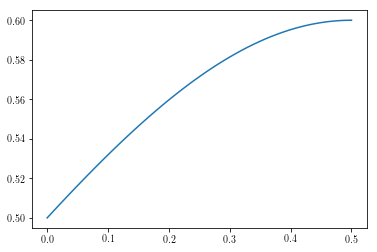

In [329]:
eps_fac=np.linspace(0,0.5,100)
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(eps_fac,-1/(2*(2*eps_fac/3-2/3*eps_fac**2-1)))